In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import polars as pl

from src.constant import LABELS
from src.preprocess import process_label

plt.style.use("tableau-colorblind10")

In [7]:
data_dir = Path("../../../input/hms-harmful-brain-activity-classification")
list(data_dir.glob("*"))
metadata = pl.read_csv(data_dir / "train.csv")
metadata = process_label(metadata)
metadata_eeg = metadata.group_by("eeg_id").agg(
    *[
        pl.col(f"{label}_prob_per_eeg").first().alias(f"{label}_prob")
        for label in LABELS
    ],
    pl.col("weight_per_eeg").first().alias("weight"),
)
metadata_segment = metadata.select(*[f"{label}_prob" for label in LABELS], "weight")
metadata_eeg.head()

eeg_id,seizure_prob,lpd_prob,gpd_prob,lrda_prob,grda_prob,other_prob,weight
i64,f64,f64,f64,f64,f64,f64,f64
17662377,0.0,0.333333,0.111111,0.055556,0.333333,0.166667,0.642857
4017591057,0.0,0.0,0.0,0.0,0.666667,0.333333,0.107143
2110395638,0.5,0.0,0.4,0.0,0.0,0.1,0.714286
2646747280,0.0,0.0,1.0,0.0,0.0,0.0,0.035714
3777011953,0.0,0.0,0.0,0.0,1.0,0.0,0.107143


seizure_prob,lpd_prob,gpd_prob,lrda_prob,grda_prob,other_prob,weight
f64,f64,f64,f64,f64,f64,f64
0.329365,0.107882,0.062975,0.083806,0.164998,0.250975,0.12212


seizure_prob,lpd_prob,gpd_prob,lrda_prob,grda_prob,other_prob,weight
f64,f64,f64,f64,f64,f64,f64
0.041959,0.18154,0.12532,0.072379,0.090424,0.488378,0.513


seizure_prob,lpd_prob,gpd_prob,lrda_prob,grda_prob,other_prob,weight
f64,f64,f64,f64,f64,f64,f64
0.036192,0.1456,0.136346,0.03226,0.073729,0.575874,0.04915


High Quality: 5525
Low Quality: 6689
Very Low Quality: 4875


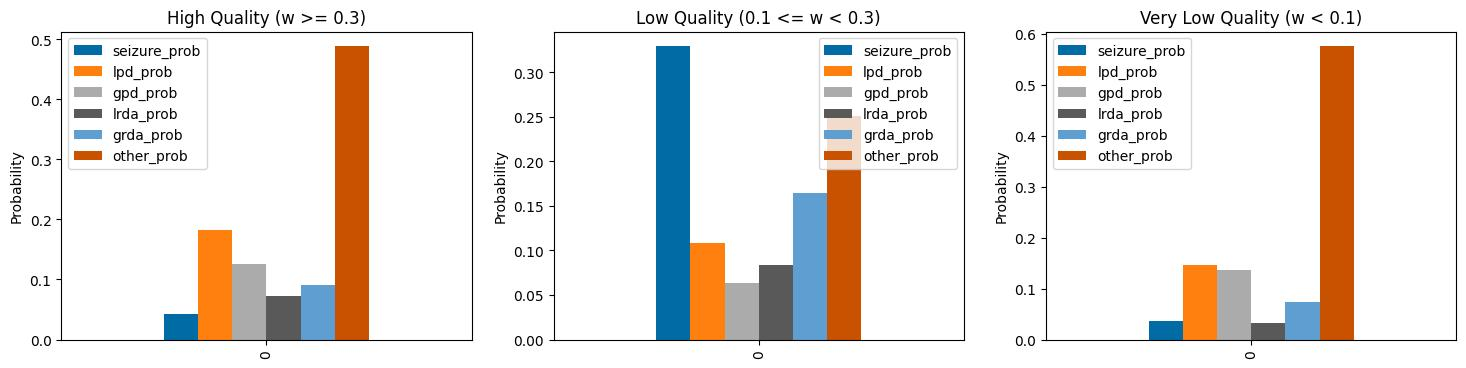

In [8]:
high_quality = metadata_eeg.filter(pl.col("weight").ge(0.3))
low_quality = metadata_eeg.filter(pl.col("weight").lt(0.3).and_(pl.col("weight").ge(0.1)))
very_low_quality = metadata_eeg.filter(pl.col("weight").lt(0.1))

display(low_quality.drop("eeg_id").mean())
display(high_quality.drop("eeg_id").mean())
display(very_low_quality.drop("eeg_id").mean())
print(f"High Quality: {high_quality.shape[0]}")
print(f"Low Quality: {low_quality.shape[0]}")
print(f"Very Low Quality: {very_low_quality.shape[0]}")

_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
high_quality.drop("eeg_id", "weight").mean().to_pandas().plot.bar(ax=ax1)
low_quality.drop("eeg_id", "weight").mean().to_pandas().plot.bar(ax=ax2)
very_low_quality.drop("eeg_id", "weight").mean().to_pandas().plot.bar(ax=ax3)

ax1.set(title="High Quality (w >= 0.3)", ylabel="Probability")
ax2.set(title="Low Quality (0.1 <= w < 0.3)", ylabel="Probability")
ax3.set(title="Very Low Quality (w < 0.1)", ylabel="Probability")
plt.show()

seizure_prob,lpd_prob,gpd_prob,lrda_prob,grda_prob,other_prob,weight
f64,f64,f64,f64,f64,f64,f64
0.329982,0.093244,0.075205,0.154996,0.225168,0.121405,0.115487


seizure_prob,lpd_prob,gpd_prob,lrda_prob,grda_prob,other_prob,weight
f64,f64,f64,f64,f64,f64,f64
0.052052,0.177368,0.203066,0.131291,0.128409,0.307815,0.51078


seizure_prob,lpd_prob,gpd_prob,lrda_prob,grda_prob,other_prob,weight
f64,f64,f64,f64,f64,f64,f64
0.04666,0.211803,0.163271,0.039545,0.070252,0.468469,0.048104


High Quality: 39946
Low Quality: 60178
Very Low Quality: 6676


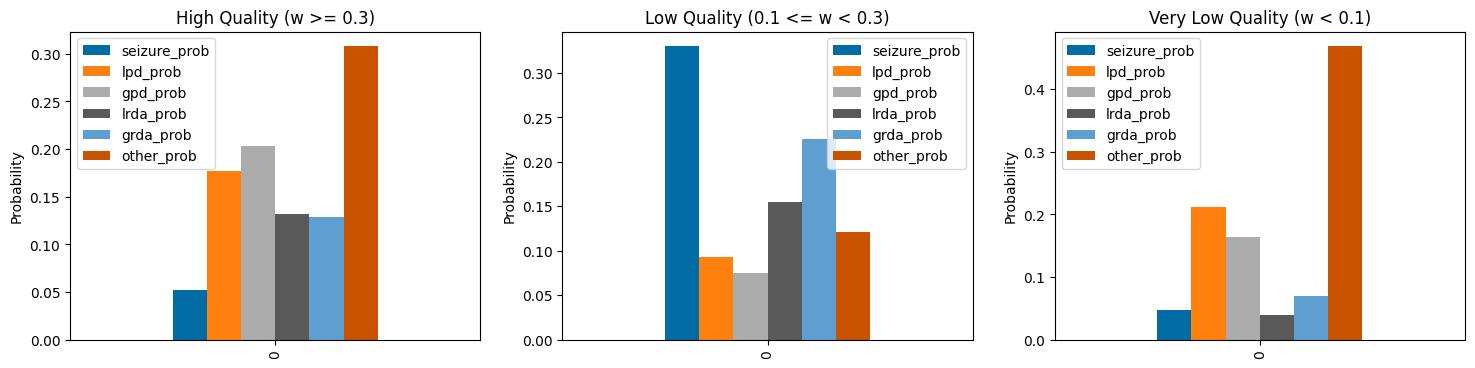

In [9]:
high_quality = metadata_segment.filter(pl.col("weight").ge(0.3))
low_quality = metadata_segment.filter(pl.col("weight").lt(0.3).and_(pl.col("weight").ge(0.1)))
very_low_quality = metadata_segment.filter(pl.col("weight").lt(0.1))

display(low_quality.drop("eeg_id").mean())
display(high_quality.drop("eeg_id").mean())
display(very_low_quality.drop("eeg_id").mean())
print(f"High Quality: {high_quality.shape[0]}")
print(f"Low Quality: {low_quality.shape[0]}")
print(f"Very Low Quality: {very_low_quality.shape[0]}")

_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
high_quality.drop("eeg_id", "weight").mean().to_pandas().plot.bar(ax=ax1)
low_quality.drop("eeg_id", "weight").mean().to_pandas().plot.bar(ax=ax2)
very_low_quality.drop("eeg_id", "weight").mean().to_pandas().plot.bar(ax=ax3)

ax1.set(title="High Quality (w >= 0.3)", ylabel="Probability")
ax2.set(title="Low Quality (0.1 <= w < 0.3)", ylabel="Probability")
ax3.set(title="Very Low Quality (w < 0.1)", ylabel="Probability")
plt.show()